# Exercises day 02 - 2


In [73]:
import numpy as np
import matplotlib.pyplot as plt

def exppdf(x : float, lam :float) -> float:
    """
        Exponential distribution probability density function.
        
        :param x: x value
        :param lam: lambda
        
        :return: probability density function value
    """
    return  lam * np.exp(-lam*x)

def normpdf(x : float, mu : float, sigma : float) -> float:
    """
        Normal distribution probability density function.
        
        :param x: x value
        :param mu: mean
        :param sigma: standard deviation
        
        :return: probability density function value
    """
    return 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-1.0 / 2 * ((mu - x) / sigma)**2)

## Ex01
Generate simulated values from different distributions

### a) Exponential


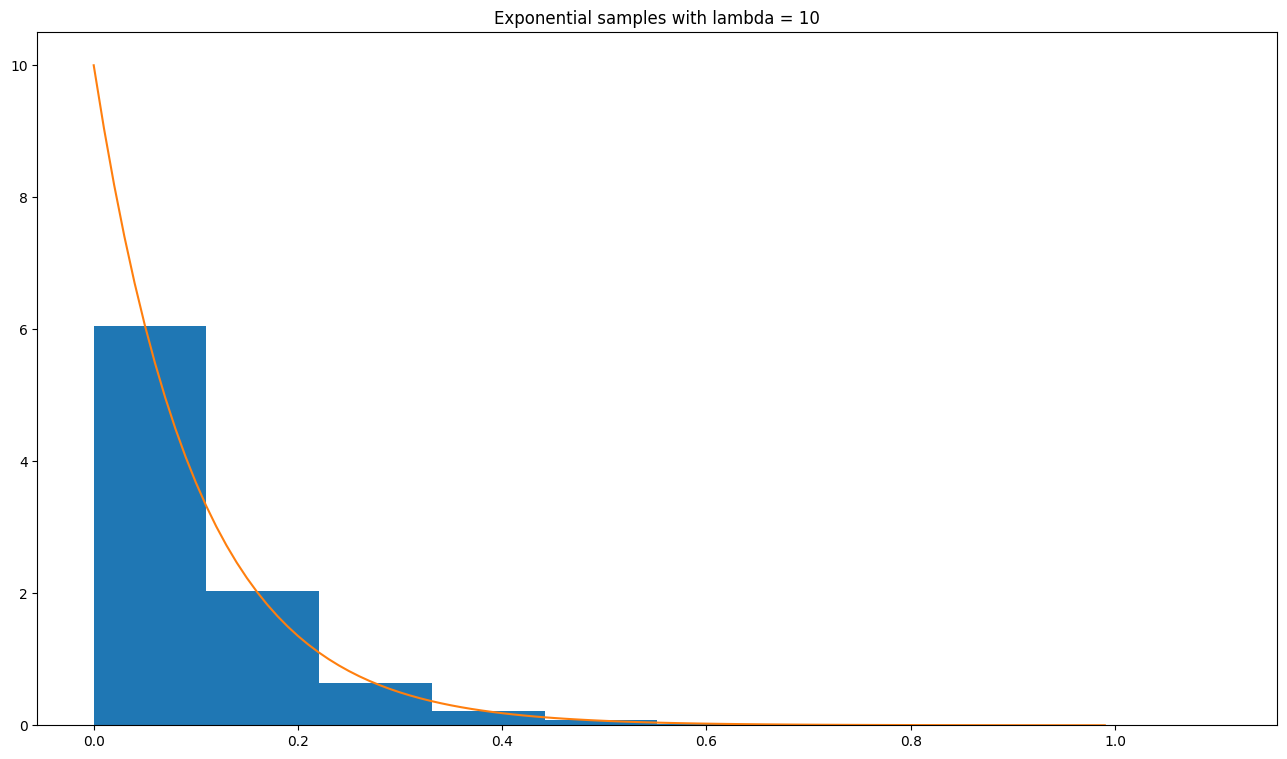

In [74]:
# Sample Uniform distribution
NUMS_TO_GENERATE = 10 ** 4
U = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)

# Exponential distribution
lambda_ = 10 
X = -np.log(U)/lambda_ 

# Plots
XX =np.arange(0,1, 0.01)
Y=np.array([exppdf(x, lambda_) for x in XX])
plt.figure(figsize=(16, 9))
plt.title(f"Exponential samples with lambda = {lambda_}")
plt.hist(X,density=True)
plt.plot(XX,Y)
plt.show()

### b) Normal (Box-Mueller)

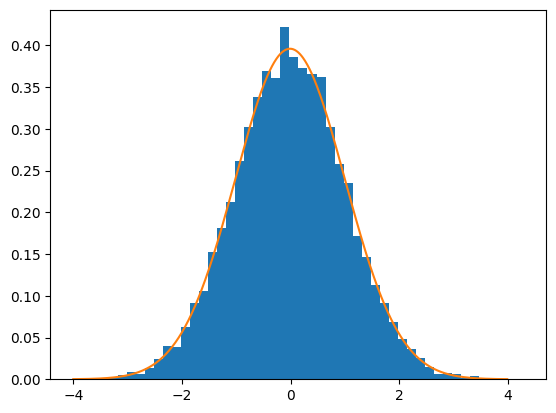

In [80]:
def box_mueller_adv(num_samples : int) -> list[float]:
    """
        Here we used the smart method which Bo introduced on slide 16 of the third lecture.
        (See slide 16 of 'slide4m1.pdf')
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: number of samples to generate.
        
        :return: list of samples.
    """
    counter = 0
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, num_samples)
    V = np.random.uniform(-1.0, 1.0, (2, num_samples))
    
    i = 0
    while counter < num_samples:
        V_1 = V[0][i]
        V_2 = V[1][i]
        R_squared = V_1**2 + V_2**2
        if R_squared <= 1:
            # We accept the samples (and calculate them as per slides)
            coeff = np.sqrt(-2 * np.log(U_1[i]))
            R = np.sqrt(R_squared)
            Z_1 = coeff * V_1 / R 
            Z_2 = coeff * V_2 / R
            accepted.append(Z_1); accepted.append(Z_2)
            counter += 2
        if i == num_samples - 1:
            # We generate new samples if we run out
            i = 0
            U_1 = np.random.uniform(0.0, 1.0, num_samples)
            V = np.random.uniform(-1.0, 1.0, (2, num_samples))
        i += 1


    return accepted
        
        
# Plot
NUMS_TO_GENERATE = 10**4
X = np.array(box_mueller_adv(NUMS_TO_GENERATE)).flatten()

XX=  np.arange(-4, 4, 0.01)
Y=np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()

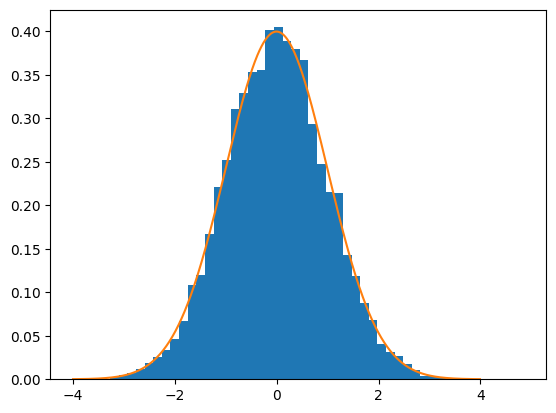

In [75]:
def box_mueller(num_samples : int) -> list[float]:
    """
        Generate num_samples samples from a standard normal distribution, by the Box-Mueller method.
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: The number of samples to generate.
        
        :return: A list of num_samples samples from a standard normal distribution.
    """
    n = (num_samples // 2 + 1)
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, n)
    U_2 = np.random.uniform(0.0, 1.0, n)
    
    for i in range(n):
        Z_1 = np.sqrt(-2 * np.log(U_1[i])) * np.cos(2 * np.pi * U_2[i])
        Z_2 = np.sqrt(-2 * np.log(U_1[i])) * np.sin(2 * np.pi * U_2[i])
        
        accepted.append(Z_1); accepted.append(Z_2)
        

    return accepted

# Plot
NUMS_TO_GENERATE = 10**4
X = np.array(box_mueller(NUMS_TO_GENERATE))

XX =  np.arange(-4, 4, 0.01)
Y = np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()


Normal distribution with central limit theorem. 

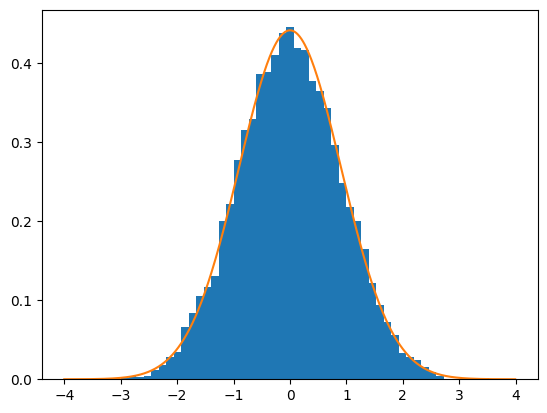

In [32]:
def norm_CLT(num_samples, n):
    # Sample Uniform distribution
    U = np.random.uniform(0.0, 1.0,(n, num_samples))

    X = np.sum(U,axis=0) - n/2

    return X

n = 10
NUMS_TO_GENERATE = 10**4

X = norm_CLT(NUMS_TO_GENERATE,n)

# Plotting
XX=  np.arange(-4, 4, 0.01)
Y=np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()



### c) Pareto distribution

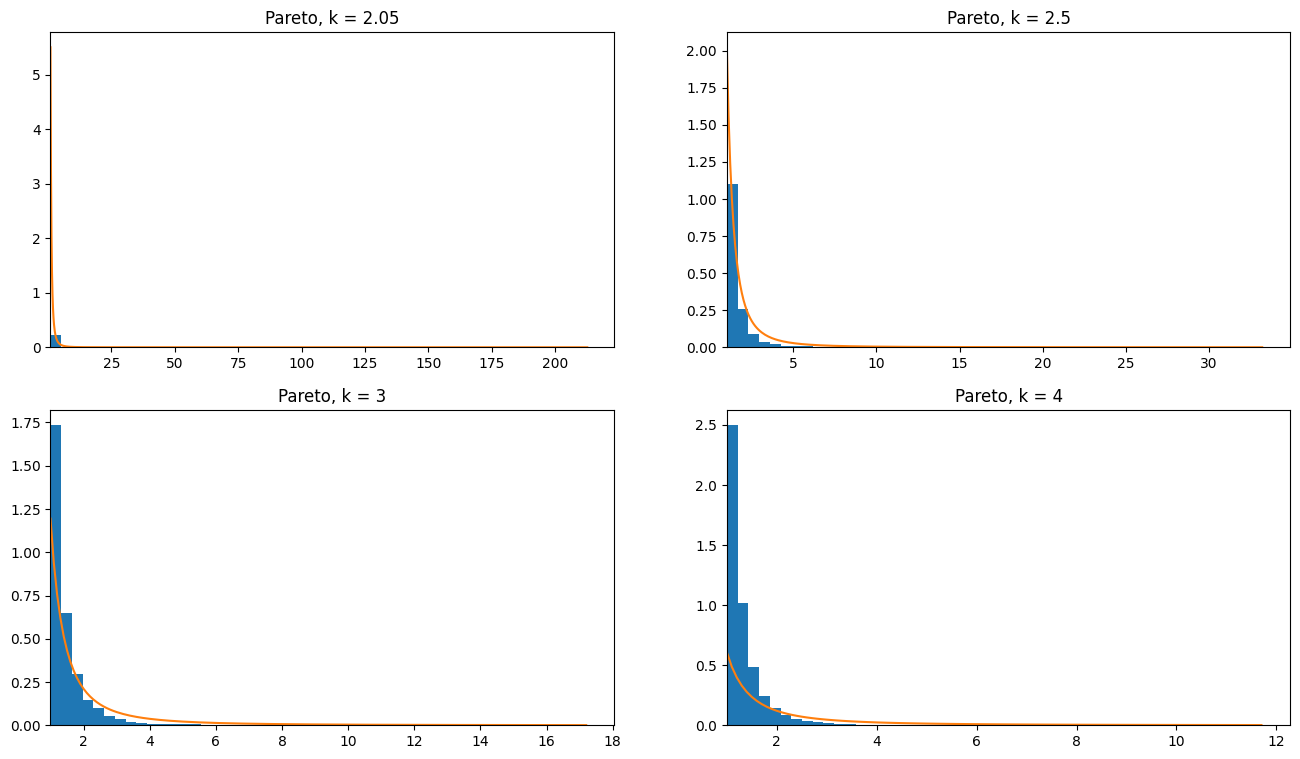

In [72]:
def paretoPDF(x, k, beta):
    # Support [beta,inf[
    return (k*beta)/(x**(k+1))

def pareto_samples(k, beta, num_samples: int):
    U = np.random.uniform(0.0, 1.0,num_samples)
    X = beta*(U**(-1/k))

    return X

beta = 1
K = [2.05, 2.5, 3, 4]


plt.figure(figsize=(16, 9))
for i,k in enumerate(K):
    plt.subplot(2, 2, i + 1)
    X = pareto_samples(k,beta, NUMS_TO_GENERATE)

    XX=  np.arange(beta, X.max(), 0.1)
    Y=np.array([paretoPDF(x, X.mean(), X.std()) for x in XX])
 
    plt.title(f"Pareto, k = {k}")
    plt.hist(X,bins=50, density=True)
    plt.xlim(left=beta)
    plt.plot(XX,Y)

plt.show()

## Ex02: Pareto distribution

For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as E(X) = 'stuff'.
Var(X) = 'stuff'.

We have by common decision (and by looking at slides) agreed that $k$ may assum real values.

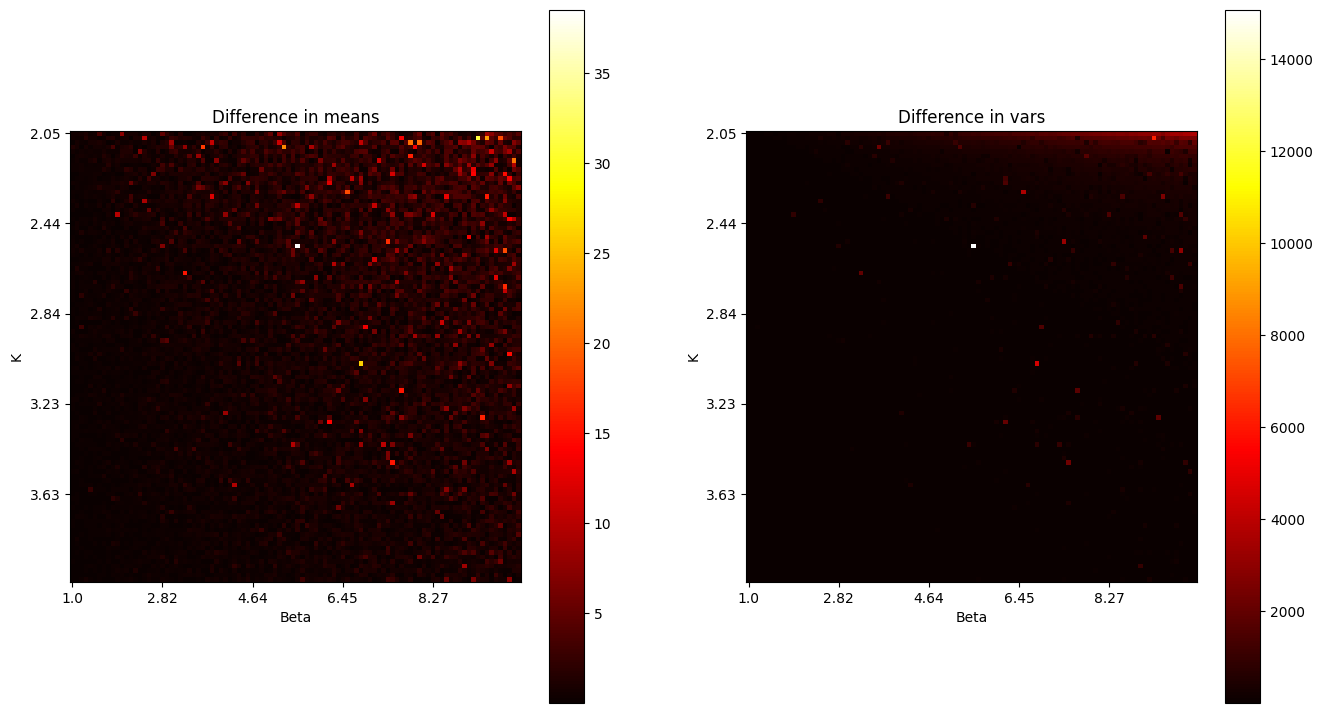

In [106]:
ks = np.linspace(2.05, 4, 100)
betas = np.linspace(1, 10, 100)

pareto_mean = np.zeros((len(ks),len(betas)))
pareto_var = np.zeros_like(pareto_mean)

for i, k in enumerate(ks):
    for j, beta in enumerate(betas):
        X = pareto_samples(k, beta, NUMS_TO_GENERATE)
        pareto_mean[i, j] = np.abs(beta * (k / (k - 1)) -  X.mean())

        pareto_var[i,j] = np.abs( beta**2*(k)/((k-1)**2*(k-2)) - X.var())


xs = [round(beta, 2) for beta in betas[::20]]
x_locs = range(100)[::20]

ys = [round(k, 2) for k in ks[::20]]
y_locs = range(100)[::20]

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.title("Difference in means")
#plt.contour([ks,betas],pareto_mean)
plt.imshow(pareto_mean, cmap='hot', interpolation='nearest')
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.subplot(1, 2, 2)  
plt.title("Difference in vars")   
plt.imshow(pareto_var, cmap='hot', interpolation='nearest') 
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.show()  


## Ex03: Normal dsitribution

For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

In [108]:
NUMS_TO_GENERATE = 10
NUMS_EXPERIMENT = 100

confidence = 0.95
for n in range(NUMS_EXPERIMENT):
    X = np.array(box_mueller(NUMS_TO_GENERATE))
    conf_mean = [X.mean - confidence * X.std()/np.sqrt(NUMS_TO_GENERATE), X.mean + confidence * X.std()/np.sqrt(NUMS_TO_GENERATE)]

    #conf = np.percentile(X,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

    print(f"{n}: Confidence intervall [{conf_mean[0]:.3f},{conf_mean[1]:.3f}]")

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'float'